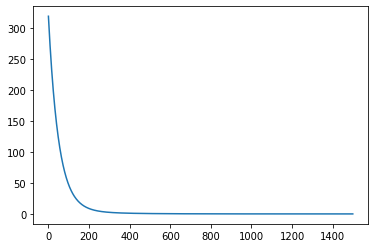

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

data1 = pd.DataFrame({"TV":[230.1,44.5,17.2,151.5],"Radio":[37.8,39.3,45.9,41.3],
                      "News":[69.1,23.1,34.7,13.2],"Sales" : [22.1,10.4,18.3,18.5]})

X = data1.iloc[:,0:3] # read first two columns into X
y = data1.iloc[:,3] # read the third column into y

m = len(y) 

# Normalization
X = (X - np.mean(X))/np.std(X)

# 
ones = np.ones((m,1))

X = np.hstack((ones, X))

y = y[:,np.newaxis]

X = tf.constant(X,dtype= tf.float32)
Y = tf.constant(y,dtype=tf.float32)

theta = np.zeros((4,1))
theta = tf.constant(theta,dtype= tf.float32)

loss_plot = list()
epochs = list()


for i in range(1500):
    # y_predicted = np.dot(X,theta)
    y_predicted = tf.tensordot(X,theta,axes =1)
    
    loss =  tf.reduce_mean(tf.square(y_predicted - Y))

    temp = y_predicted - Y
    temp = tf.tensordot(tf.transpose(X), temp,axes =1)
    theta = theta - (0.01/m) * temp
    
    loss_plot.append(loss)
    epochs.append(i)


plt.plot(epochs,loss_plot)